In [1]:
!wget https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

--2022-02-24 11:02:43--  https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg
Resolving sovzond.ru (sovzond.ru)... 62.213.94.106
Connecting to sovzond.ru (sovzond.ru)|62.213.94.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 459534 (449K) [image/jpeg]
Saving to: ‘Исходный-аэрофотоснимок.jpg.1’

Исходный-аэрофотосн 100%[===================>] 448.76K   266KB/s    in 1.7s    

2022-02-24 11:02:46 (266 KB/s) - ‘Исходный-аэрофотоснимок.jpg.1’ saved [459534/459534]



In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [3]:
IMG_PATH = 'Исходный-аэрофотоснимок.jpg'

# Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [4]:
img = cv2.imread(IMG_PATH)

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

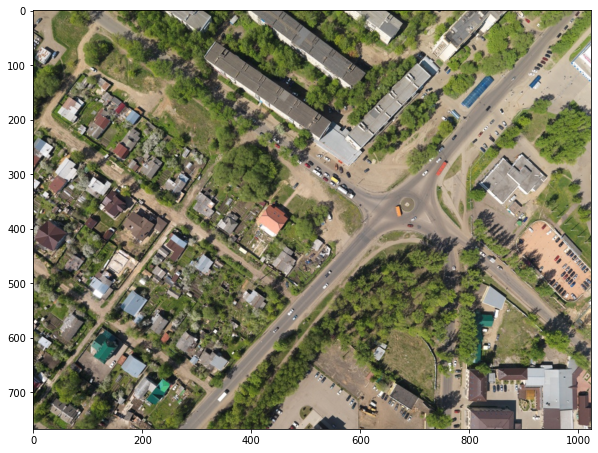

In [6]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

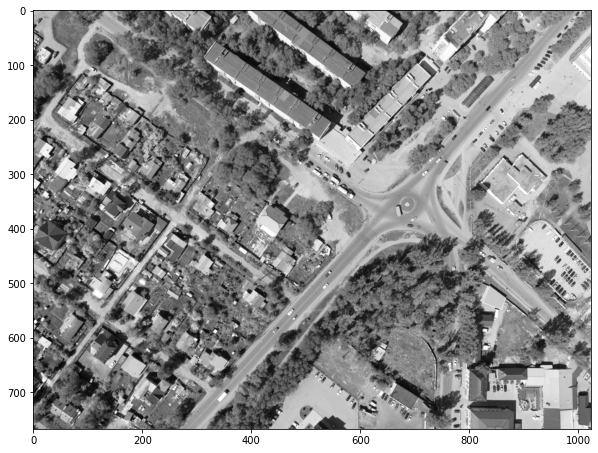

In [8]:
plt.figure(figsize=[10, 10])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [9]:
img_gray = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)

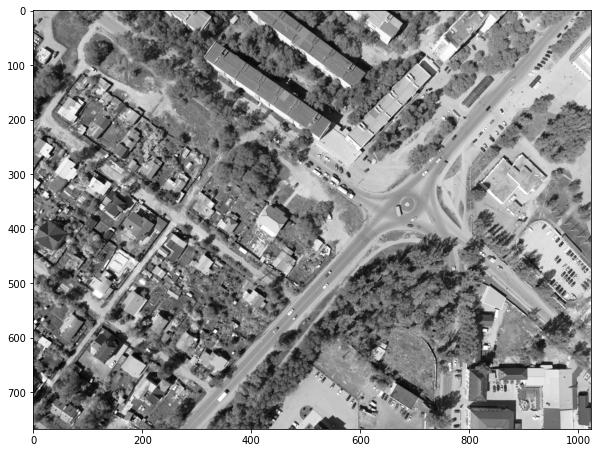

In [10]:
plt.figure(figsize=[10, 10])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [11]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (768, 1024)
img_gray.dtype =  uint8


## Упражнение 1 RGB -> gray

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [12]:
def convert_rgb_to_grayscale(img_rgb):
    return np.rint(0.299 * img_rgb[:, :, 0] + 0.587 * img_rgb[:, :, 1] + 0.114 * img_rgb[:, :, 2]).astype('uint8')

In [13]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

## Вопрос 1
Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:**

Сигнал яркости, в основном, определяется зеленым цветом, так как у человека зрительная система наиболее чувствительна к зеленому цвету. Поэтому игнорируя коэффициенты при сложении и преобразовывая с помощью среднего арифметического, мы потеряем детали изображения.

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

### RGB $\to$ HSV

In [14]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

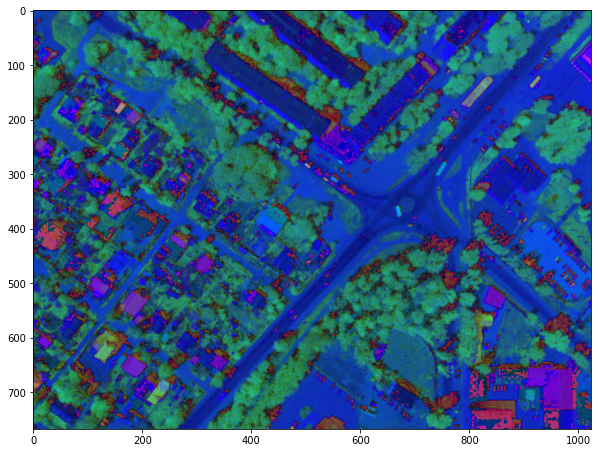

In [15]:
plt.figure(figsize=[10, 10])
plt.imshow(img_hsv)

### RGB $\to$ YUV

In [16]:
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

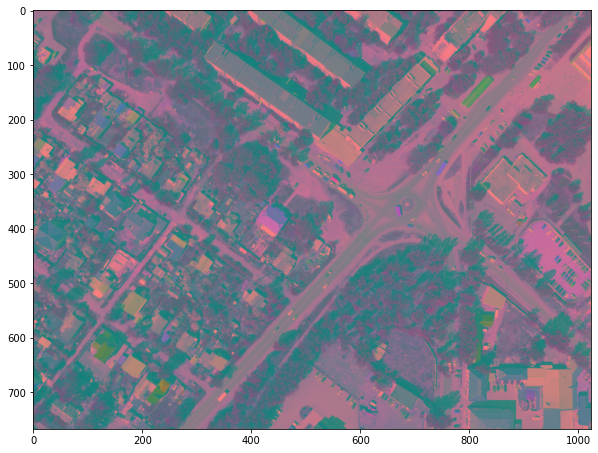

In [17]:
plt.figure(figsize=[10, 10])
plt.imshow(img_yuv)

## Упражнение 2
Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

### RGB $\to$ CIE XYZ

Для того, чтобы получить чистый спетр в голубом-зеленом промежутке, нужно добавить отрицательное кол-во красного цвета. Чтобы избежать эту проблему, был разработан CIE XYZ, который содержит все чистые спектральные цвета, используя только положительные координаты у спектров всех цветов.

![RGB](http://sv-journal.org/2015-4/03/en/files/image001.png)

у RGB на картинке выше спектр красного цвета принимает значения ниже нуля

![XYZ](https://scipython.com/static/media/blog/colours/cie-cmf.png)

у CIE XYZ все значения спектров иоложительные

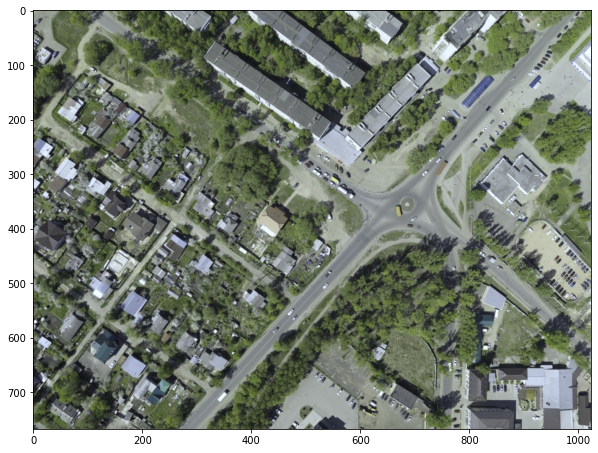

In [18]:
img_xyz = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2XYZ)

plt.figure(figsize=[10, 10])
plt.imshow(img_xyz)

### RGB $\to$ CIE L\*a\*b\*

CIE L\*a\*b\* по факту отображение из CIE XYZ, где различия в цвете и яркости более однородные для глаза. Теперь все компоненты рассчитываются относительно условной точки чисто белого цвета.

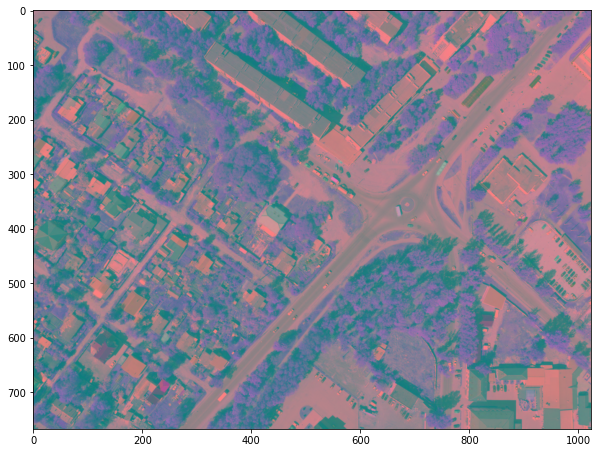

In [19]:
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)

plt.figure(figsize=[10, 10])
plt.imshow(img_lab)

### RGB $\to$ YCrCb JPEG (or YCC)

YCbCr похож на YUV, но использует другие коэффициенты, чтобы уложиться в 8битный диапазон, доступный для цифровых сигналов.

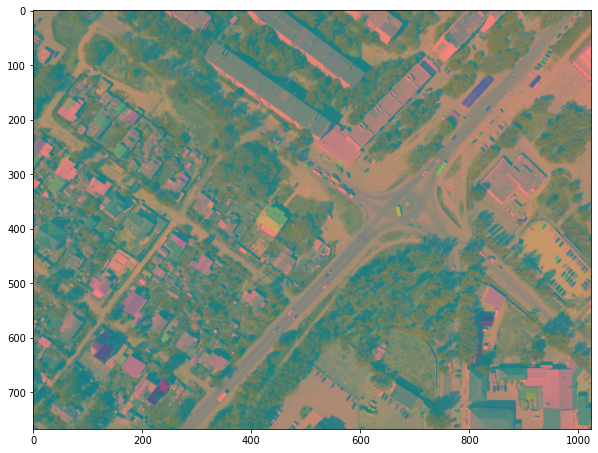

In [20]:
img_ycc = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)

plt.figure(figsize=[10, 10])
plt.imshow(img_ycc)

## Упражнение 3 RGB $\to$ HSV

Реализуйте самостоятельно конвертацию из RGB в HSV и сравните её с реализацией в OpenCV.


In [21]:
def rgb_to_hsv(img_rgb):
    r, g, b = cv2.split(img_rgb)
    r = r / 255.
    g = g / 255.
    b = b / 255.

    v = img_rgb.max(axis=2).astype('float') / 255.
    min_rgb = img_rgb.min(axis=2).astype('float') / 255.
    s = np.rint(255. * (v - min_rgb) / v).astype('uint8')

    h, w = v.shape
    hue = np.zeros((h, w), dtype=float)
    for i in range(h):
        for j in range(w):
            if v[i, j] == min_rgb[i, j]:
                hue[i, j] = 0
            elif v[i, j] == r[i, j]:
                hue[i, j] = 60 * (g[i, j] - b[i, j]) / (v[i, j] - min_rgb[i, j]) 
            elif v[i, j] == g[i, j]:
                hue[i, j] = 120 + 60 * (b[i, j] - r[i, j]) / (v[i, j] - min_rgb[i, j]) 
            elif v[i, j] == b[i, j]:
                hue[i, j] = 240 + 60 * (r[i, j] - g[i, j]) / (v[i, j] - min_rgb[i, j]) 

            if hue[i, j] < 0: 
                hue[i, j] += 360

            hue[i, j] /= 2

    return np.stack([np.rint(hue).astype('uint8'), s, np.rint(255. * v).astype('uint8')]).transpose(1, 2, 0)

In [22]:
my_hsv = rgb_to_hsv(img_rgb)
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

my_hsv = my_hsv.astype('int')
hsv = hsv.astype('int')

Учитывая то, что функции в OpenCV реализованы на плюсах, то существует разница при округлении, поэтому допустима погрешность $<= 1$ между значениями массивов.

In [23]:
assert(np.max(rgb_to_hsv(img_rgb) - cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV) <= 1).all())

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**

HSV часто используется в тех задачах, где требуется отделить цветовые компоненты от интесивности света. Например, для удаления теней или повышения устойчивости к изменениям освещения.

CMYK используется для печати, потому что его компоненты - наиболее дешевые краски.

YUV был создан для аналогового телевидения (NTSC, PAL и SECAM).


# Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [24]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [25]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [26]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

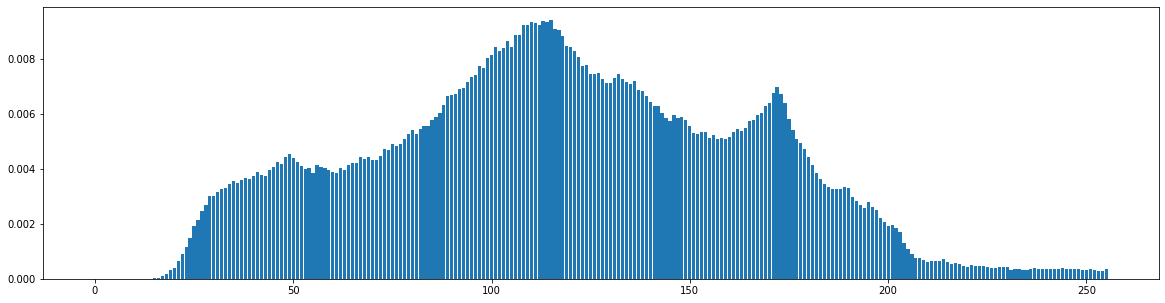

In [27]:
visualize_hist(hist_cv)

## Упражнение 3 Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения.

In [28]:
def compute_hist(img):
    hist = {i: 0 for i in range(256)}
    values, counts = np.unique(img.flatten(), return_counts=True)
    for k, v in zip(values, counts):
        hist[k] = v
    return np.array(list(hist.values()))

In [29]:
hist_my = compute_hist(img_gray)

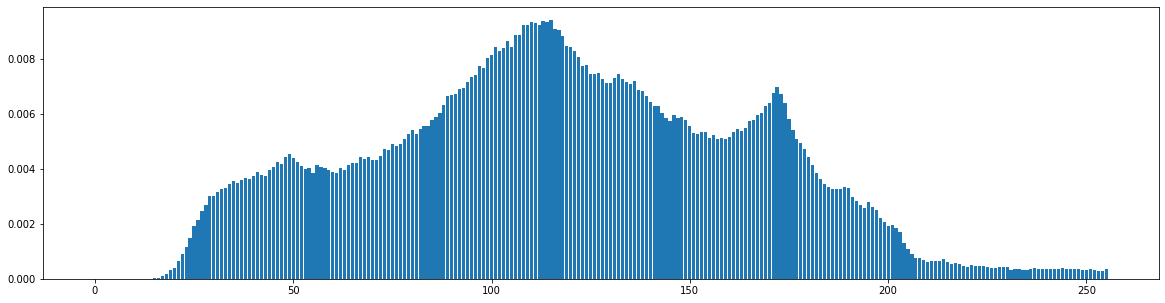

In [30]:
visualize_hist(hist_my)

In [31]:
assert((hist_my == hist_cv).all())

 ## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:**

По гистограмме можно сказать, является ли изображение засвеченным или затемненным.

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ:**

В зависимости от жанра фильма будет зависеть динамика гистограммы: быстрее, если это боевик, либо медленнее, если это романтический фильм.

## Упражнение 4 JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Коэффициент сжатия: 19.7


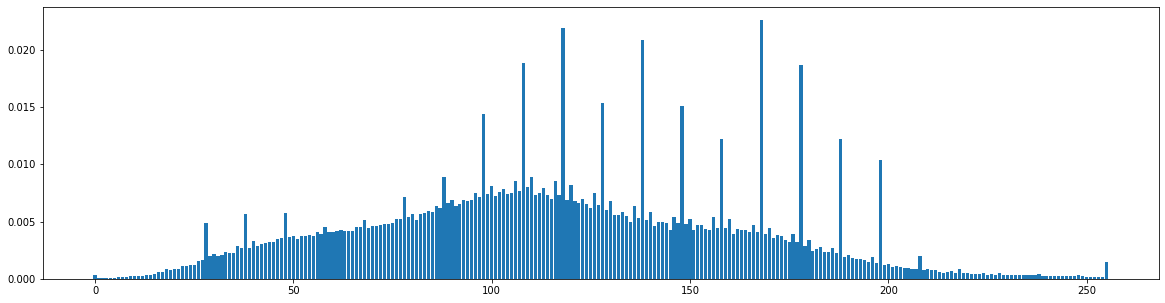

In [32]:
_, img_jpeg_0 = cv2.imencode('.jpg', img_gray, (cv2.IMWRITE_JPEG_QUALITY, 10))

print('Коэффициент сжатия: {:.1f}'.format(np.array(img_gray.shape).prod() / np.array(img_jpeg_0.shape).prod()))

img_jpeg_0 = cv2.imdecode(img_jpeg_0, cv2.IMREAD_COLOR)

visualize_hist(compute_hist(img_jpeg_0))

Коэффициент сжатия: 53.7


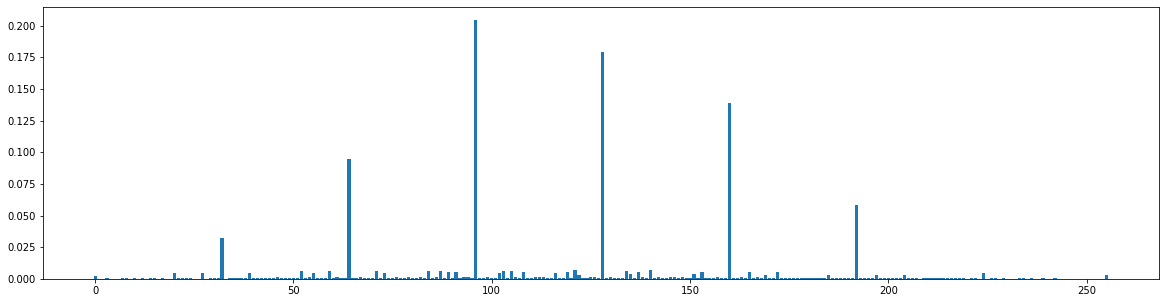

In [33]:
_, img_jpeg_1 = cv2.imencode('.jpg', img_gray, (cv2.IMWRITE_JPEG_QUALITY, 1))

print('Коэффициент сжатия: {:.1f}'.format(np.array(img_gray.shape).prod() / np.array(img_jpeg_1.shape).prod()))

img_jpeg_1 = cv2.imdecode(img_jpeg_1, cv2.IMREAD_COLOR)

visualize_hist(compute_hist(img_jpeg_1))

Интенсивности цвета сжимаются в соседние, чтобы было меньше уникальных значений и было легче сжать.

## Упражнение 5 Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

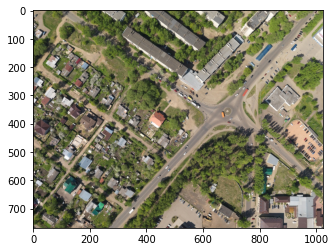

In [34]:
plt.imshow(img_rgb)

In [35]:
hsv = rgb_to_hsv(img_rgb)
mask = cv2.inRange(hsv, (30, 0, 0), (70, 255, 255))

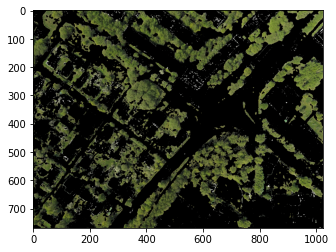

In [36]:
green = np.zeros_like(img_rgb, np.uint8)
green[mask > 0] = img_rgb[mask > 0]

plt.imshow(green)

In [37]:
print('Доля зеленых насаждений: ', np.sum(mask > 0) / np.array(mask.shape).prod())

Доля зеленых насаждений:  0.3762041727701823


Погрешность около 7-12%.

## Упражнение Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [38]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img
        
        i_img = self.img.astype('int')
        i_img = np.pad(i_img, (1, 0))

        h, w = self.img.shape
        for i in range(1, h + 1):
            for j in range(1, w + 1):
                i_img[i, j] += i_img[i - 1, j] + i_img[i, j - 1] - i_img[i - 1, j - 1]
                
        self.i_img = i_img

    def sum(self, x, y, w, h):
        return self.i_img[x, y] + self.i_img[x + w, y + h] - self.i_img[x + w, y] - self.i_img[x, y + h] 

    def get_integral_image(self):
        return self.i_img


In [39]:
I = IntegralImage(img_gray)

In [40]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:**

Интегральное изображение может потребоваться для быстрого вычисления яркости на заданном кусочке изображения, к примеру, для вейвлет-преобразований, фильтров Хаара.

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:**

Динамическое программирование.